In [2]:
import itk

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
dim = 2
ImageType = itk.Image[itk.F, dim]
TransformType = itk.AffineTransform[itk.D,dim]
OptimizerType = itk.GradientDescentOptimizer;
ExhaustiveOptimizerType = itk.ExhaustiveOptimizer
MetricType = itk.MutualInformationImageToImageMetric[ImageType, ImageType]
RegistrationType = itk.ImageRegistrationMethod[ImageType, ImageType]
InterpolatorType = itk.LinearInterpolateImageFunction[ImageType, itk.D]

In [4]:
fixed_img = itk.imread('fixed.png', itk.F)
moving_img = itk.imread('moving.png', itk.F)

## Plot parameter space

In [5]:
transform = TransformType.New()
metric = MetricType.New()
optimizer = ExhaustiveOptimizerType.New()
registrar = RegistrationType.New()
interpolator = InterpolatorType.New()

In [6]:
metric.SetNumberOfSpatialSamples(100)
metric.SetFixedImageStandardDeviation(0.4)
metric.SetMovingImageStandardDeviation(0.4)

In [7]:
optimizer.SetNumberOfSteps([0,0,0,0,50,50])

# Initialize scales and set back to optimizer
scales = optimizer.GetScales()
scales.SetSize(6)
for i in range(0,4):
    scales.SetElement(i, 0.001)
scales.SetElement(4,1.0)
scales.SetElement(5,1.0)
optimizer.SetScales(scales)

In [8]:
registrar.SetFixedImage(fixed_img)
registrar.SetMovingImage(moving_img)
registrar.SetOptimizer(optimizer)
registrar.SetTransform(transform)
registrar.SetInterpolator(interpolator)
registrar.SetMetric(metric)

registrar.SetFixedImageRegion(fixed_img.GetBufferedRegion())
registrar.SetInitialTransformParameters(transform.GetParameters())

In [9]:
surface = dict()

def print_iteration():
    surface[tuple(optimizer.GetCurrentPosition())] = optimizer.GetCurrentValue()
    
optimizer.AddObserver(itk.IterationEvent(), print_iteration)

0

In [10]:
registrar.Update()

In [11]:
i_x = 4
i_y = 5

x_vals = [list(set([x[i] 
                for x in surface.keys()])) for i in range(0,6)]

for i in range(0,6):
    x_vals[i].sort()

X, Y = np.meshgrid(x_vals[i_x], x_vals[i_y])
Z = np.array([[surface[(1,0,0,1,x0,x1)] for x1 in x_vals[i_y]] for x0 in x_vals[i_x]])

In [12]:
print(optimizer.GetMaximumMetricValue())
print(list(optimizer.GetMaximumMetricValuePosition()))


0.5985683792704721
[1.0, 0.0, 0.0, 1.0, 12.0, 4.0]


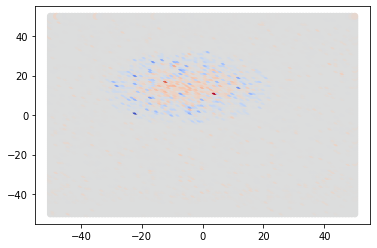

In [13]:
fig = plt.figure()
ax = plt.axes()

surf = ax.scatter(X, Y, c=Z, cmap=cm.coolwarm)

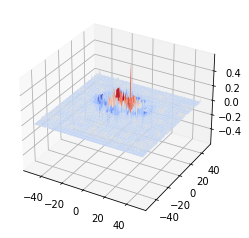

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X,Y,Z,cmap=cm.coolwarm)

## Follow gradient descent

In [38]:
transform = TransformType.New()
metric = MetricType.New()
optimizer = OptimizerType.New()
registrar = RegistrationType.New()
interpolator = InterpolatorType.New()

In [39]:
registrar.SetFixedImage(fixed_img)
registrar.SetMovingImage(moving_img)
registrar.SetOptimizer(optimizer)
registrar.SetTransform(transform)
registrar.SetInterpolator(interpolator)
registrar.SetMetric(metric)

registrar.SetFixedImageRegion(fixed_img.GetBufferedRegion())
registrar.SetInitialTransformParameters(transform.GetParameters())

In [40]:
metric.SetNumberOfSpatialSamples(100)

optimizer.SetLearningRate(15.0)
optimizer.SetNumberOfIterations(100)
optimizer.MaximizeOn()

In [41]:
def print_iteration():
    print(f'It: {optimizer.GetCurrentIteration()}\t'
         f'Position: {list(optimizer.GetCurrentPosition())}\t'
         f'Value: {optimizer.GetValue()}')

optimizer.AddObserver(itk.IterationEvent(), print_iteration)

0

In [42]:
registrar.Update()

It: 0	Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]	Value: 0.0880025694464388
It: 1	Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]	Value: 0.0012397204173959508
It: 2	Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]	Value: 0.00508795541421847
It: 3	Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]	Value: -0.05252495222226461
It: 4	Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]	Value: 0.0016772587230580172
It: 5	Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]	Value: 0.0023051695140106077
It: 6	Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]	Value: -0.0059834207248705695
It: 7	Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]	Value: 0.0007383177392750184
It: 8	Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]	Value: -0.052218564453490046
It: 9	Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]	Value: 0.0016772587230580172
It: 10	Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]	Value: -0.00044326635259750446
It: 11	Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]	Value: 0.006013229134198106
It: 12	Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]	Value: 0.001365995404536413
It: 13	Positio

In [47]:
print(f'Its: {optimizer.GetCurrentIteration()}')
print(f'Value: {optimizer.GetValue()}')
print(f'Position: {list(registrar.GetLastTransformParameters())}')

Its: 100
Value: 0.0016845555801108247
Position: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
